In [1]:
#Importing neccesary python libraries to use for my analysis of data.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import requests

In [3]:
def welcome (x):
    print("Welcome " + x)

welcome("reader,")
welcome("to the code behind my Data Analytics Project.")

Welcome reader,
Welcome to the code behind my Data Analytics Project.


In [4]:
#Loading dataset into notebook

In [5]:
pd.read_csv(r"C:\\Users\murph\OneDrive\Documents\nba22.csv")

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,162,Joel Embiid,C,27,PHI,68,68,33.8,9.8,19.6,...,0.814,2.1,9.6,11.7,4.2,1.1,1.5,3.1,2.7,30.6
1,274,LeBron James,C,37,LAL,56,56,37.2,11.4,21.8,...,0.756,1.1,7.1,8.2,6.2,1.3,1.1,3.5,2.2,30.3
2,12,Giannis Antetokounmpo,PF,27,MIL,67,67,32.9,10.3,18.6,...,0.722,2.0,9.6,11.6,5.8,1.1,1.4,3.3,3.2,29.9
3,154,Kevin Durant,PF,33,BRK,55,55,37.2,10.5,20.3,...,0.910,0.5,6.9,7.4,6.4,0.9,0.9,3.5,2.1,29.9
4,141,Luka Doncic,PG,22,DAL,65,65,35.4,9.9,21.6,...,0.744,0.9,8.3,9.1,8.7,1.2,0.6,4.5,2.2,28.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,433,Jaysean Paige,PG,27,DET,1,0,7.0,0.0,3.0,...,NaN,0.0,1.0,1.0,1.0,0.0,0.0,1.0,2.0,0.0
601,434,Trayvon Palmer,SG,27,DET,1,0,17.0,0.0,1.0,...,NaN,0.0,2.0,2.0,0.0,0.0,0.0,1.0,2.0,0.0
602,529,Emanuel Terry,PF,25,PHO,3,0,6.0,0.0,1.7,...,NaN,2.7,2.3,5.0,0.7,0.3,0.0,1.7,1.3,0.0
603,531,Jon Teske,C,24,MEM,3,0,2.7,0.0,0.3,...,0.000,0.0,0.7,0.7,0.3,0.3,0.0,0.0,0.3,0.0


In [6]:
#Preparing and cleaning data for analysis

In [7]:
nba22 = pd.read_csv('nba22.csv')
nba22.drop_duplicates()
nba22.fillna(0)
print(nba22.head())

    Rk                 Player Pos  Age   Tm   G  GS    MP    FG   FGA  ...  \
0  162            Joel Embiid   C   27  PHI  68  68  33.8   9.8  19.6  ...   
1  274           LeBron James   C   37  LAL  56  56  37.2  11.4  21.8  ...   
2   12  Giannis Antetokounmpo  PF   27  MIL  67  67  32.9  10.3  18.6  ...   
3  154           Kevin Durant  PF   33  BRK  55  55  37.2  10.5  20.3  ...   
4  141            Luka Doncic  PG   22  DAL  65  65  35.4   9.9  21.6  ...   

     FT%  ORB  DRB   TRB  AST  STL  BLK  TOV   PF   PTS  
0  0.814  2.1  9.6  11.7  4.2  1.1  1.5  3.1  2.7  30.6  
1  0.756  1.1  7.1   8.2  6.2  1.3  1.1  3.5  2.2  30.3  
2  0.722  2.0  9.6  11.6  5.8  1.1  1.4  3.3  3.2  29.9  
3  0.910  0.5  6.9   7.4  6.4  0.9  0.9  3.5  2.1  29.9  
4  0.744  0.9  8.3   9.1  8.7  1.2  0.6  4.5  2.2  28.4  

[5 rows x 30 columns]


In [8]:
nba22teams = nba22.sort_values(['Tm', 'MP'])
nba22teams = nba22teams.reset_index(drop=True)
print(nba22teams.head(34))

     Rk                   Player Pos  Age   Tm   G  GS    MP   FG   FGA  ...  \
0   116           Sharife Cooper  PG   20  ATL  13   0   3.0  0.2   1.1  ...   
1    30               Cat Barber  PG   27  ATL   3   0   4.3  0.0   1.3  ...   
2   283            Jalen Johnson  PF   20  ATL  22   0   5.5  1.0   1.9  ...   
3   359              Skylar Mays  SG   24  ATL  28   5   7.9  1.1   2.3  ...   
4   138             Gorgui Dieng   C   32  ATL  44   3   8.4  1.2   2.5  ...   
5   241             Solomon Hill  SF   30  ATL  13   1  10.7  0.2   1.5  ...   
6   342  Timothé Luwawu-Cabarrot  SF   26  ATL  52  18  13.2  1.4   3.6  ...   
7   587             Lou Williams  PG   35  ATL  56   0  14.3  2.2   5.7  ...   
8   597             Delon Wright  SG   29  ATL  77   8  18.9  1.6   3.5  ...   
9   422           Onyeka Okongwu   C   21  ATL  48   6  20.7  3.3   4.7  ...   
10  426           Cameron Oliver  SF   25  ATL   2   0  21.5  5.0   7.5  ...   
11  182         Danilo Gallinari  PF   3

In [9]:
nba22teams.groupby(['Tm', 'MP']).apply(lambda df: df.loc[df.PTS.idxmax()])

Rk                    Player Pos  Age   Tm   G  GS    MP   FG  \
Tm  MP                                                                     
ATL 3.0   116            Sharife Cooper  PG   20  ATL  13   0   3.0  0.2   
    4.3    30                Cat Barber  PG   27  ATL   3   0   4.3  0.0   
    5.5   283             Jalen Johnson  PF   20  ATL  22   0   5.5  1.0   
    7.9   359               Skylar Mays  SG   24  ATL  28   5   7.9  1.1   
    8.4   138              Gorgui Dieng   C   32  ATL  44   3   8.4  1.2   
...       ...                       ...  ..  ...  ...  ..  ..   ...  ...   
WAS 23.4  308             Corey Kispert  SF   22  WAS  77  36  23.4  3.0   
    24.2   20               Deni Avdija  SF   21  WAS  82   8  24.2  3.0   
    30.2   89  Kentavious Caldwell-Pope  SG   28  WAS  77  77  30.2  4.7   
    33.4  319                Kyle Kuzma  PF   26  WAS  66  66  33.4  6.4   
    36.0   41              Bradley Beal  SG   28  WAS  40  40  36.0  8.7   

           FGA  ...    FT%  ORB  DRB  TRB  AST  STL  BLK  TOV   PF   PTS  
Tm  MP          ...                                                       
ATL 3.0    1.1  ...    NaN  0.0  0.4  0.4  0.4  0.0  0.0  0.4  0.1   0.5  
    4.3    1.3  ...  0.000  0.3  0.7  1.0  1.0  0.0  0.0  0.3  0.3   0.0  
    5.5    1.9  ...  0.714  0.1  1.1  1.2  0.1  0.1  0.1  0.4  0.4   2.4  
    7.9    2.3  ...  0.889  0.2  0.7  0.9  0.6  0.3  0.0  0.4  0.3   2.9  
    8.4    2.5  ...  0.731  0.7  2.0  2.8  0.8  0.3  0.3  0.5  1.2   3.5  
...        ...  ...    ...  ...  ...  ...  ...  ...  ...  ...  ...   ...  
WAS 23.4   6.7  ...  0.871  0.7  2.0  2.7  1.1  0.5  0.3  0.6  1.2   8.2  
    24.2   7.1  ...  0.757  0.6  4.5  5.2  2.0  0.7  0.5  1.1  2.3   8.4  
    30.2  10.8  ...  0.890  0.5  2.9  3.4  1.9  1.1  0.3  1.3  1.8  13.2  
    33.4  14.2  ...  0.712  1.1  7.4  8.5  3.5  0.6  0.9  2.6  1.9  17.1  
    36.0  19.3  ...  0.833  1.0  3.8  4.7  6.6  0.9  0.4  3.4  2.4  23.2  

[569 rows x 30 columns]

In [10]:
#General statistical overview of each column in the dataset which shows for example the mean age of a player in the NBA in 2022 as well as many other important statistical benchmarks.

In [11]:
nba22.describe()

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,605.000000,605.000000,605.000000,605.000000,605.000000,605.000000,605.000000,596.000000,605.000000,605.000000,...,546.000000,605.000000,605.000000,605.000000,605.000000,605.000000,605.000000,605.000000,605.000000,605.00000
mean,303.000000,25.748760,43.039669,20.330579,18.914380,3.036860,6.722149,0.438450,0.915537,2.685785,...,0.747626,0.825124,2.621983,3.446942,1.868264,0.606777,0.369421,1.016198,1.601322,8.24000
std,174.792734,4.123068,25.816438,25.803187,9.748631,2.293602,4.822698,0.133072,0.862322,2.268689,...,0.148856,0.746557,1.834853,2.405157,1.833794,0.414757,0.375236,0.825626,0.797761,6.33314
min,1.000000,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,152.000000,23.000000,17.000000,0.000000,11.100000,1.300000,3.200000,0.394000,0.200000,0.900000,...,0.681000,0.300000,1.300000,1.800000,0.600000,0.300000,0.100000,0.500000,1.000000,3.50000
50%,303.000000,25.000000,48.000000,7.000000,18.100000,2.600000,5.500000,0.443500,0.700000,2.100000,...,0.767500,0.600000,2.400000,3.000000,1.200000,0.500000,0.300000,0.800000,1.600000,6.90000
75%,454.000000,28.000000,66.000000,35.000000,27.300000,4.100000,9.100000,0.498250,1.400000,4.100000,...,0.842000,1.100000,3.500000,4.500000,2.500000,0.900000,0.500000,1.300000,2.200000,11.10000
max,605.000000,41.000000,82.000000,82.000000,43.500000,11.400000,21.800000,1.000000,4.500000,11.700000,...,1.000000,4.600000,11.000000,14.700000,10.800000,2.300000,2.800000,4.500000,3.800000,30.60000


In [12]:
#Seeing what teams played the most players during the season. The TOT result is for players that have played for two or more teams during the year

In [13]:
nba22['Tm'].value_counts()

TOT    97
OKC    25
DET    22
MEM    22
NYK    20
ORL    19
ATL    19
CLE    19
PHO    19
MIA    18
DAL    18
CHI    18
TOR    18
LAL    18
WAS    17
DEN    17
GSW    16
MIN    16
UTA    16
POR    15
SAC    15
CHO    15
BOS    15
SAS    15
IND    14
PHI    14
NOP    14
BRK    14
MIL    14
HOU    13
LAC    13
Name: Tm, dtype: int64

In [14]:
#Adding in new columns into the dataset to help with further analysis

In [15]:
nba22["PRA"] = nba22["PTS"] + nba22["TRB"] + nba22["AST"]
print(nba22)

      Rk                 Player Pos  Age   Tm   G  GS    MP    FG   FGA  ...  \
0    162            Joel Embiid   C   27  PHI  68  68  33.8   9.8  19.6  ...   
1    274           LeBron James   C   37  LAL  56  56  37.2  11.4  21.8  ...   
2     12  Giannis Antetokounmpo  PF   27  MIL  67  67  32.9  10.3  18.6  ...   
3    154           Kevin Durant  PF   33  BRK  55  55  37.2  10.5  20.3  ...   
4    141            Luka Doncic  PG   22  DAL  65  65  35.4   9.9  21.6  ...   
..   ...                    ...  ..  ...  ...  ..  ..   ...   ...   ...  ...   
600  433          Jaysean Paige  PG   27  DET   1   0   7.0   0.0   3.0  ...   
601  434         Trayvon Palmer  SG   27  DET   1   0  17.0   0.0   1.0  ...   
602  529          Emanuel Terry  PF   25  PHO   3   0   6.0   0.0   1.7  ...   
603  531              Jon Teske   C   24  MEM   3   0   2.7   0.0   0.3  ...   
604  564            M.J. Walker  SG   23  PHO   2   0   4.0   0.0   2.0  ...   

     ORB  DRB   TRB  AST  STL  BLK  TOV

In [16]:
nba22["AST/TO"] = nba22["AST"]/nba22["TOV"]
print(nba22.head())

    Rk                 Player Pos  Age   Tm   G  GS    MP    FG   FGA  ...  \
0  162            Joel Embiid   C   27  PHI  68  68  33.8   9.8  19.6  ...   
1  274           LeBron James   C   37  LAL  56  56  37.2  11.4  21.8  ...   
2   12  Giannis Antetokounmpo  PF   27  MIL  67  67  32.9  10.3  18.6  ...   
3  154           Kevin Durant  PF   33  BRK  55  55  37.2  10.5  20.3  ...   
4  141            Luka Doncic  PG   22  DAL  65  65  35.4   9.9  21.6  ...   

   DRB   TRB  AST  STL  BLK  TOV   PF   PTS   PRA    AST/TO  
0  9.6  11.7  4.2  1.1  1.5  3.1  2.7  30.6  46.5  1.354839  
1  7.1   8.2  6.2  1.3  1.1  3.5  2.2  30.3  44.7  1.771429  
2  9.6  11.6  5.8  1.1  1.4  3.3  3.2  29.9  47.3  1.757576  
3  6.9   7.4  6.4  0.9  0.9  3.5  2.1  29.9  43.7  1.828571  
4  8.3   9.1  8.7  1.2  0.6  4.5  2.2  28.4  46.2  1.933333  

[5 rows x 32 columns]


In [17]:
#Creating a new list from original dataset. 

In [18]:
playmaker = nba22[["Player","Pos","Tm","MP","AST","TOV","AST/TO"]]
print(playmaker.head())

                  Player Pos   Tm    MP  AST  TOV    AST/TO
0            Joel Embiid   C  PHI  33.8  4.2  3.1  1.354839
1           LeBron James   C  LAL  37.2  6.2  3.5  1.771429
2  Giannis Antetokounmpo  PF  MIL  32.9  5.8  3.3  1.757576
3           Kevin Durant  PF  BRK  37.2  6.4  3.5  1.828571
4            Luka Doncic  PG  DAL  35.4  8.7  4.5  1.933333


In [19]:
#This cell returns efficient playmakers who play at least 15 minutes a game average 2 or more assists a game and don't turn the ball over when creating opportunity for their teammates. 

In [20]:
playmaker = playmaker[(playmaker.MP >= 15) & (playmaker.AST >= 2)].sort_values(by=['AST/TO'], ascending=False)
playmaker = playmaker.reset_index(drop=True)
print(playmaker.head(10))

             Player       Pos   Tm    MP   AST  TOV    AST/TO
0        Tyus Jones        PG  MEM  21.2   4.4  0.6  7.333333
1         Tre Jones        PG  SAS  16.6   3.4  0.7  4.857143
2        Chris Paul        PG  PHO  32.9  10.8  2.4  4.500000
3    T.J. McConnell        PG  IND  24.1   4.9  1.1  4.454545
4      Monte Morris        PG  DEN  29.9   4.4  1.0  4.400000
5   Justin Anderson        SF  TOT  19.8   2.1  0.5  4.200000
6  Tomáš Satoranský  SG-PG-SF  TOT  16.5   3.3  0.8  4.125000
7    Andre Iguodala        SF  GSW  19.5   3.7  0.9  4.111111
8     Jose Alvarado        PG  NOP  15.4   2.8  0.7  4.000000
9      Delon Wright        SG  ATL  18.9   2.4  0.6  4.000000


In [21]:
nba22["FT_PTS"] = nba22["PTS"] - nba22["FT"]
nba22["FT_PTS%"] = 1 -(nba22["FT_PTS"] / nba22["PTS"])

In [22]:
free_throw_scorer = nba22[["Player","Pos","Tm","FT","FTA","FT%","PTS","FT_PTS","FT_PTS%"]]
print(free_throw_scorer)

                    Player Pos   Tm   FT   FTA    FT%   PTS  FT_PTS   FT_PTS%
0              Joel Embiid   C  PHI  9.6  11.8  0.814  30.6    21.0  0.313725
1             LeBron James   C  LAL  4.5   6.0  0.756  30.3    25.8  0.148515
2    Giannis Antetokounmpo  PF  MIL  8.3  11.4  0.722  29.9    21.6  0.277592
3             Kevin Durant  PF  BRK  6.8   7.4  0.910  29.9    23.1  0.227425
4              Luka Doncic  PG  DAL  5.6   7.5  0.744  28.4    22.8  0.197183
..                     ...  ..  ...  ...   ...    ...   ...     ...       ...
600          Jaysean Paige  PG  DET  0.0   0.0    NaN   0.0     0.0       NaN
601         Trayvon Palmer  SG  DET  0.0   0.0    NaN   0.0     0.0       NaN
602          Emanuel Terry  PF  PHO  0.0   0.0    NaN   0.0     0.0       NaN
603              Jon Teske   C  MEM  0.0   0.7  0.000   0.0     0.0       NaN
604            M.J. Walker  SG  PHO  0.0   0.0    NaN   0.0     0.0       NaN

[605 rows x 9 columns]


In [23]:
#Creating a new list from original dataset. This will show us what players rely most heavily on free throws for their average points per game. We want to see players who score in the higher echelons of points per game so we filter to see players who score 15 or more points per game as well as scoring two free throws a game.

In [24]:
Linereliance = free_throw_scorer[(free_throw_scorer.PTS >= 15) & (free_throw_scorer.FT_PTS >= 2)].sort_values(by=['FT_PTS%'], ascending=False)
Linereliance = Linereliance.reset_index(drop=True)
print(Linereliance.head(10))

                    Player Pos   Tm   FT   FTA    FT%   PTS  FT_PTS   FT_PTS%
0             James Harden  PG  TOT  7.2   8.2  0.877  22.0    14.8  0.327273
1             Jimmy Butler  SF  MIA  6.9   8.0  0.870  21.4    14.5  0.322430
2              Joel Embiid   C  PHI  9.6  11.8  0.814  30.6    21.0  0.313725
3              Rudy Gobert   C  UTA  4.6   6.7  0.690  15.6    11.0  0.294872
4    Giannis Antetokounmpo  PF  MIL  8.3  11.4  0.722  29.9    21.6  0.277592
5          Harrison Barnes  PF  SAC  4.4   5.4  0.826  16.4    12.0  0.268293
6            DeMar DeRozan  PF  CHI  6.8   7.8  0.877  27.9    21.1  0.243728
7       Kristaps Porzingis  PF  TOT  4.9   5.6  0.867  20.2    15.3  0.242574
8              Bam Adebayo   C  MIA  4.6   6.1  0.753  19.1    14.5  0.240838
9  Shai Gilgeous-Alexander  PG  OKC  5.9   7.2  0.810  24.5    18.6  0.240816


In [25]:
#Creating a new list from original dataset. Here we are seeing all round players that contribute in the main three facets of the game scoring points, assisting teammates and rebounding the ball.

In [26]:
allround = nba22[nba22.PRA >= 35].sort_values(by=['PRA'], ascending=False)
allround = allround.reset_index(drop=True)
print(allround.head(10))

    Rk                 Player Pos  Age   Tm   G  GS    MP    FG   FGA  ...  \
0  290           Nikola Jokic   C   26  DEN  74  74  33.5  10.3  17.7  ...   
1   12  Giannis Antetokounmpo  PF   27  MIL  67  67  32.9  10.3  18.6  ...   
2  162            Joel Embiid   C   27  PHI  68  68  33.8   9.8  19.6  ...   
3  141            Luka Doncic  PG   22  DAL  65  65  35.4   9.9  21.6  ...   
4  274           LeBron James   C   37  LAL  56  56  37.2  11.4  21.8  ...   
5  154           Kevin Durant  PF   33  BRK  55  55  37.2  10.5  20.3  ...   
6  602             Trae Young  PG   23  ATL  76  76  34.9   9.4  20.3  ...   
7  218           James Harden  PG   32  TOT  65  65  37.2   6.3  15.3  ...   
8  390              Ja Morant  PG   22  MEM  57  57  33.1  10.2  20.6  ...   
9  526           Jayson Tatum  SF   23  BOS  76  76  35.9   9.3  20.6  ...   

    AST  STL  BLK  TOV   PF   PTS   PRA    AST/TO  FT_PTS   FT_PTS%  
0   7.9  1.5  0.9  3.8  2.6  27.1  48.8  2.078947    22.0  0.188192  
1

In [27]:
#Importing data into notebook via url.

In [28]:
url = 'https://www.basketball-reference.com/awards/awards_2022.html#mvp'
html = requests.get(url).content
mvp_list = pd.read_html(html)
mvp = mvp_list[0]
print(mvp)
mvp.to_csv('mvp22.csv')

   Unnamed: 0_level_0     Unnamed: 1_level_0 Unnamed: 2_level_0  \
                 Rank                 Player                Age   
0                   1           Nikola Jokić                 26   
1                   2            Joel Embiid                 27   
2                   3  Giannis Antetokounmpo                 27   
3                   4           Devin Booker                 25   
4                   5            Luka Dončić                 22   
5                   6           Jayson Tatum                 23   
6                   7              Ja Morant                 22   
7                   8          Stephen Curry                 33   
8                   9             Chris Paul                 36   
9                 10T          DeMar DeRozan                 32   
10                10T           Kevin Durant                 33   
11                10T           LeBron James                 37   

   Unnamed: 3_level_0 Voting                        Unnamed: 

In [29]:
print(mvp)

   Unnamed: 0_level_0     Unnamed: 1_level_0 Unnamed: 2_level_0  \
                 Rank                 Player                Age   
0                   1           Nikola Jokić                 26   
1                   2            Joel Embiid                 27   
2                   3  Giannis Antetokounmpo                 27   
3                   4           Devin Booker                 25   
4                   5            Luka Dončić                 22   
5                   6           Jayson Tatum                 23   
6                   7              Ja Morant                 22   
7                   8          Stephen Curry                 33   
8                   9             Chris Paul                 36   
9                 10T          DeMar DeRozan                 32   
10                10T           Kevin Durant                 33   
11                10T           LeBron James                 37   

   Unnamed: 3_level_0 Voting                        Unnamed: 

In [30]:
mvp.columns = ["Rank", "Player", "Age", "Team","1st","Pts Won","Pts Max","Share","G","MP","PTS","TRB","AST","STL","BLK","FG%","3P%","FT%","WS","WS/48"]
print(mvp)

   Rank                 Player  Age Team   1st  Pts Won  Pts Max  Share   G  \
0     1           Nikola Jokić   26  DEN  65.0    875.0     1000  0.875  74   
1     2            Joel Embiid   27  PHI  26.0    706.0     1000  0.706  68   
2     3  Giannis Antetokounmpo   27  MIL   9.0    595.0     1000  0.595  67   
3     4           Devin Booker   25  PHO   0.0    216.0     1000  0.216  68   
4     5            Luka Dončić   22  DAL   0.0    146.0     1000  0.146  65   
5     6           Jayson Tatum   23  BOS   0.0     43.0     1000  0.043  76   
6     7              Ja Morant   22  MEM   0.0     10.0     1000  0.010  57   
7     8          Stephen Curry   33  GSW   0.0      4.0     1000  0.004  64   
8     9             Chris Paul   36  PHO   0.0      2.0     1000  0.002  65   
9   10T          DeMar DeRozan   32  CHI   0.0      1.0     1000  0.001  76   
10  10T           Kevin Durant   33  BRK   0.0      1.0     1000  0.001  55   
11  10T           LeBron James   37  LAL   0.0      

In [31]:
mvp22 = mvp[["Rank","Player","Team","1st","Pts Won","Pts Max","Share"]]
print(mvp22)

   Rank                 Player Team   1st  Pts Won  Pts Max  Share
0     1           Nikola Jokić  DEN  65.0    875.0     1000  0.875
1     2            Joel Embiid  PHI  26.0    706.0     1000  0.706
2     3  Giannis Antetokounmpo  MIL   9.0    595.0     1000  0.595
3     4           Devin Booker  PHO   0.0    216.0     1000  0.216
4     5            Luka Dončić  DAL   0.0    146.0     1000  0.146
5     6           Jayson Tatum  BOS   0.0     43.0     1000  0.043
6     7              Ja Morant  MEM   0.0     10.0     1000  0.010
7     8          Stephen Curry  GSW   0.0      4.0     1000  0.004
8     9             Chris Paul  PHO   0.0      2.0     1000  0.002
9   10T          DeMar DeRozan  CHI   0.0      1.0     1000  0.001
10  10T           Kevin Durant  BRK   0.0      1.0     1000  0.001
11  10T           LeBron James  LAL   0.0      1.0     1000  0.001


In [32]:
#Creating Bar chart to track the number of votes each MVP Candidate received in 2022.

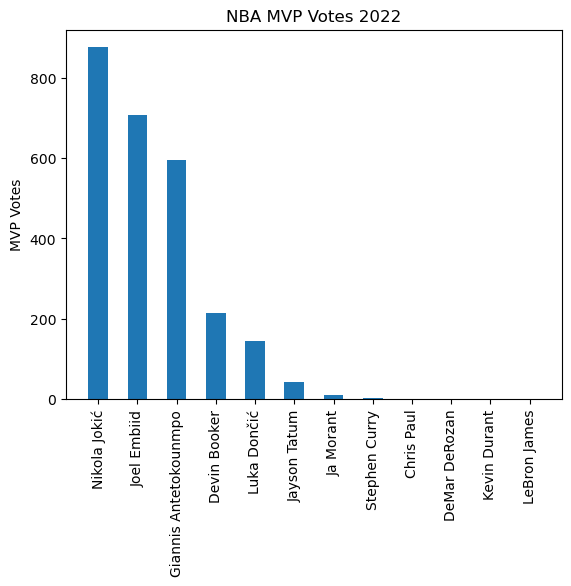

In [33]:
plt.bar(x=mvp22['Player'],height=mvp22['Pts Won'],width=0.5)
plt.title('NBA MVP Votes 2022')
plt.ylabel("MVP Votes")
plt.xticks(rotation=90)
plt.show()

In [34]:
potentialmvps22 = mvp[["Player","G","TRB","AST","PTS"]]
potentialmvps22 = potentialmvps22.reset_index(drop=True)
print(potentialmvps22.head(10))

                  Player   G   TRB   AST   PTS
0           Nikola Jokić  74  13.8   7.9  27.1
1            Joel Embiid  68  11.7   4.2  30.6
2  Giannis Antetokounmpo  67  11.6   5.8  29.9
3           Devin Booker  68   5.0   4.8  26.8
4            Luka Dončić  65   9.1   8.7  28.4
5           Jayson Tatum  76   8.0   4.4  26.9
6              Ja Morant  57   5.7   6.7  27.4
7          Stephen Curry  64   5.2   6.3  25.5
8             Chris Paul  65   4.4  10.8  14.7
9          DeMar DeRozan  76   5.2   4.9  27.9


In [35]:
#Creating a Scatter graph to see the breakdown of how many minutes each age group plays on average.

Text(0.5, 1.0, 'Age vs Minutes per Game')

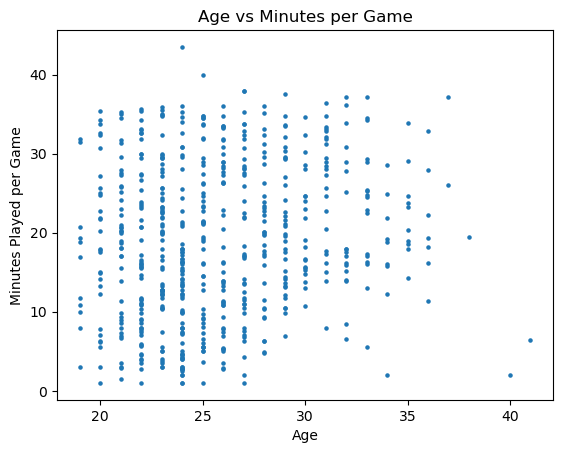

In [36]:
plt.scatter(x=nba22["Age"],y=nba22["MP"],s=5)
plt.xlabel("Age")
plt.ylabel("Minutes Played per Game")
plt.title("Age vs Minutes per Game")

In [37]:
#Merging mvp22 data with the nba22 data.

In [38]:
nbamvp22 = nba22.merge(mvp22, on='Player').sort_values(by=['Pts Won'], ascending=False)
print(nbamvp22)

    Rk                 Player Pos  Age   Tm   G  GS    MP    FG   FGA  ...  \
0  162            Joel Embiid   C   27  PHI  68  68  33.8   9.8  19.6  ...   
2   12  Giannis Antetokounmpo  PF   27  MIL  67  67  32.9  10.3  18.6  ...   
7   59           Devin Booker  SG   25  PHO  68  68  34.5   9.7  20.9  ...   
6  526           Jayson Tatum  SF   23  BOS  76  76  35.9   9.3  20.6  ...   
5  390              Ja Morant  PG   22  MEM  57  57  33.1  10.2  20.6  ...   
8  126          Stephen Curry  PG   33  GSW  64  64  34.5   8.4  19.1  ...   
9  438             Chris Paul  PG   36  PHO  65  65  32.9   5.6  11.3  ...   
1  274           LeBron James   C   37  LAL  56  56  37.2  11.4  21.8  ...   
3  154           Kevin Durant  PF   33  BRK  55  55  37.2  10.5  20.3  ...   
4  134          DeMar DeRozan  PF   32  CHI  76  76  36.1  10.2  20.2  ...   

    PRA    AST/TO  FT_PTS   FT_PTS%  Rank  Team   1st  Pts Won  Pts Max  Share  
0  46.5  1.354839    21.0  0.313725     2   PHI  26.0    706

In [39]:
#Showing the relationship between FGA and PTS via Linear Regression and charting it.

In [40]:
x= nbamvp22["FGA"]
y = nbamvp22["PTS"]

x = np.array(x).reshape(-1,1)
y = np.array(y).reshape(-1,1)

model = linear_model.LinearRegression()    
model.fit(x,y)

LinearRegression()

In [41]:
r2 = round(model.score(x,y), 2)            
predicted_y = model.predict(x) 

Text(10, 25, 'R2=0.79')

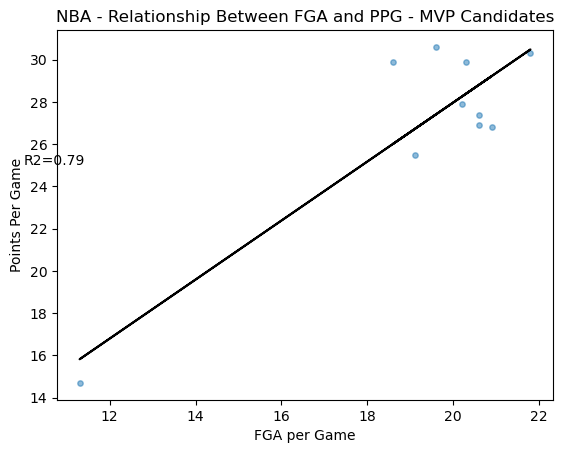

In [42]:
plt.scatter(x, y, s=15, alpha=.5)
plt.plot(x, predicted_y, color = 'black')
plt.title('NBA - Relationship Between FGA and PPG - MVP Candidates')
plt.xlabel('FGA per Game')
plt.ylabel('Points Per Game')
plt.text(10,25, f'R2={r2}') 

In [43]:
x= nba22["FGA"]
y = nba22["PTS"]

x = np.array(x).reshape(-1,1)
y = np.array(y).reshape(-1,1)

model = linear_model.LinearRegression()    
model.fit(x,y)

LinearRegression()

In [44]:
r2 = round(model.score(x,y), 2)            
predicted_y = model.predict(x)

Text(10, 25, 'R2=0.96')

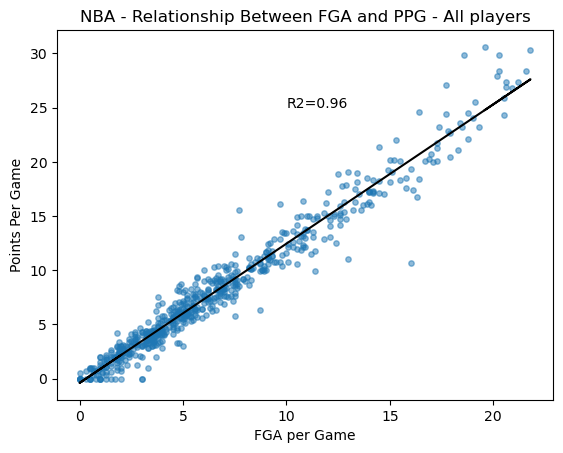

In [45]:
plt.scatter(x, y, s=15, alpha=.5)
plt.plot(x, predicted_y, color = 'black')
plt.title('NBA - Relationship Between FGA and PPG - All players')
plt.xlabel('FGA per Game')
plt.ylabel('Points Per Game')
plt.text(10,25, f'R2={r2}') 

In [46]:
mvp.describe()

,Age,1st,Pts Won,Pts Max,Share,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48
count,12.000000,12.000000,12.000000,12.0,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,28.583333,8.333333,216.666667,1000.0,0.216667,65.916667,34.750000,27.116667,7.941667,6.425000,1.208333,0.733333,0.498333,0.352083,0.822917,9.475000,0.199250
std,5.384461,19.420389,319.757958,0.0,0.319758,7.267091,1.587737,4.232307,3.086469,1.931615,0.277843,0.422833,0.042493,0.027158,0.066491,2.581798,0.050115
min,22.000000,0.000000,1.000000,1000.0,0.001000,55.000000,32.900000,14.700000,4.400000,4.200000,0.900000,0.300000,0.437000,0.293000,0.722000,6.700000,0.154000
25%,24.500000,0.000000,1.750000,1000.0,0.001750,62.250000,33.400000,26.875000,5.200000,4.875000,1.075000,0.400000,0.463750,0.342250,0.759750,7.600000,0.166500
50%,27.000000,0.000000,26.500000,1000.0,0.026500,66.000000,34.500000,27.650000,7.700000,6.250000,1.150000,0.600000,0.496000,0.353000,0.825500,8.600000,0.172500
75%,33.000000,2.250000,310.750000,1000.0,0.310750,69.500000,35.950000,29.900000,9.725000,7.000000,1.300000,0.950000,0.519500,0.373250,0.870250,10.200000,0.220500
max,37.000000,65.000000,875.000000,1000.0,0.875000,76.000000,37.200000,30.600000,13.800000,10.800000,1.900000,1.500000,0.583000,0.383000,0.923000,15.200000,0.296000


In [47]:
#Loading dataset into notebook

In [48]:
pd.read_csv(r"C:\\Users\murph\OneDrive\Documents\nba23.csv")

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,142,Joel Embiid,C,28,PHI,66,66,34.6,11.0,20.1,...,0.86,1.7,8.4,10.2,4.2,1.0,1.7,3.4,3.1,33.1
1,124,Luka Doncic,PG,23,DAL,66,66,36.2,10.9,22.0,...,0.74,0.8,7.8,8.6,8.0,1.4,0.5,3.6,2.5,32.4
2,291,Damian Lillard,PG,32,POR,58,58,36.3,9.6,20.7,...,0.91,0.8,4.0,4.8,7.3,0.9,0.3,3.3,1.9,32.2
3,163,Shai Gilgeous-Alexander,PG,24,OKC,68,68,35.5,10.4,20.3,...,0.91,0.9,4.0,4.8,5.5,1.6,1.0,2.8,2.8,31.4
4,11,Giannis Antetokounmpo,PF,28,MIL,63,63,32.1,11.2,20.3,...,0.65,2.2,9.6,11.8,5.7,0.8,0.8,3.9,3.1,31.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,67,Sterling Brown,SG,27,LAL,4,0,6.0,0.0,1.0,...,NaN,0.8,1.3,2.0,0.5,0.8,0.0,0.0,1.0,0.0
534,73,Deonte Burton,SG,29,SAC,2,0,3.0,0.0,1.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
535,150,Michael Foster Jr.,PF,20,PHI,1,0,1.0,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536,232,Frank Jackson,PG,24,UTA,1,0,5.0,0.0,3.0,...,NaN,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0


In [49]:
#Preparing and cleaning data for analysis

In [50]:
nba23 = pd.read_csv('nba23.csv')
nba23.drop_duplicates()
nba23.fillna(0)
print(nba23.head())

    Rk                   Player Pos  Age   Tm   G  GS    MP    FG   FGA  ...  \
0  142              Joel Embiid   C   28  PHI  66  66  34.6  11.0  20.1  ...   
1  124              Luka Doncic  PG   23  DAL  66  66  36.2  10.9  22.0  ...   
2  291           Damian Lillard  PG   32  POR  58  58  36.3   9.6  20.7  ...   
3  163  Shai Gilgeous-Alexander  PG   24  OKC  68  68  35.5  10.4  20.3  ...   
4   11    Giannis Antetokounmpo  PF   28  MIL  63  63  32.1  11.2  20.3  ...   

    FT%  ORB  DRB   TRB  AST  STL  BLK  TOV   PF   PTS  
0  0.86  1.7  8.4  10.2  4.2  1.0  1.7  3.4  3.1  33.1  
1  0.74  0.8  7.8   8.6  8.0  1.4  0.5  3.6  2.5  32.4  
2  0.91  0.8  4.0   4.8  7.3  0.9  0.3  3.3  1.9  32.2  
3  0.91  0.9  4.0   4.8  5.5  1.6  1.0  2.8  2.8  31.4  
4  0.65  2.2  9.6  11.8  5.7  0.8  0.8  3.9  3.1  31.1  

[5 rows x 30 columns]


In [51]:
nba23["PRA"] = nba23["PTS"] + nba23["TRB"] + nba23["AST"]
print(nba23)

      Rk                   Player Pos  Age   Tm   G  GS    MP    FG   FGA  \
0    142              Joel Embiid   C   28  PHI  66  66  34.6  11.0  20.1   
1    124              Luka Doncic  PG   23  DAL  66  66  36.2  10.9  22.0   
2    291           Damian Lillard  PG   32  POR  58  58  36.3   9.6  20.7   
3    163  Shai Gilgeous-Alexander  PG   24  OKC  68  68  35.5  10.4  20.3   
4     11    Giannis Antetokounmpo  PF   28  MIL  63  63  32.1  11.2  20.3   
..   ...                      ...  ..  ...  ...  ..  ..   ...   ...   ...   
533   67           Sterling Brown  SG   27  LAL   4   0   6.0   0.0   1.0   
534   73            Deonte Burton  SG   29  SAC   2   0   3.0   0.0   1.0   
535  150       Michael Foster Jr.  PF   20  PHI   1   0   1.0   0.0   0.0   
536  232            Frank Jackson  PG   24  UTA   1   0   5.0   0.0   3.0   
537  514         Alondes Williams  SG   23  BRK   1   0   5.0   0.0   0.0   

     ...  ORB  DRB   TRB  AST  STL  BLK  TOV   PF   PTS   PRA  
0    ...  1

In [52]:
#Filtering the to see what players could be mvp candidates in 2023 via the minimum stats that were eligible for consideration in 2022

In [53]:
potentialmvps = nba23[(nba23.PTS >= 14.7) & (nba23.TRB >= 4.4) & (nba23.AST >= 4.20) & (nba23.PRA >= 40.0)].sort_values(by=['PRA'], ascending=False)
potentialmvps = potentialmvps.reset_index(drop=True)
print(potentialmvps)

     Rk                   Player    Pos  Age   Tm   G  GS    MP    FG   FGA  \
0   124              Luka Doncic     PG   23  DAL  66  66  36.2  10.9  22.0   
1    11    Giannis Antetokounmpo     PF   28  MIL  63  63  32.1  11.2  20.3   
2   142              Joel Embiid      C   28  PHI  66  66  34.6  11.0  20.1   
3   248             Nikola Jokic      C   27  DEN  69  69  33.7   9.4  14.8   
4   291           Damian Lillard     PG   32  POR  58  58  36.3   9.6  20.7   
5   238             LeBron James     PF   38  LAL  55  54  35.5  11.1  22.2   
6   464             Jayson Tatum     PF   24  BOS  74  74  36.9   9.8  21.1   
7   107            Stephen Curry     PG   34  GSW  56  56  34.7  10.0  20.2   
8   163  Shai Gilgeous-Alexander     PG   24  OKC  68  68  35.5  10.4  20.3   
9   136             Kevin Durant  PF-SF   34  TOT  47  47  35.6  10.3  18.3   
10  345                Ja Morant     PG   23  MEM  61  59  31.9   9.3  19.9   

    ...  ORB  DRB   TRB  AST  STL  BLK  TOV   PF   

In [54]:
potentialmvps23 = potentialmvps[["Player","G","TRB","AST","PTS"]]
potentialmvps23 = potentialmvps23.reset_index(drop=True)
print(potentialmvps23.head(10))

                    Player   G   TRB  AST   PTS
0              Luka Doncic  66   8.6  8.0  32.4
1    Giannis Antetokounmpo  63  11.8  5.7  31.1
2              Joel Embiid  66  10.2  4.2  33.1
3             Nikola Jokic  69  11.8  9.8  24.5
4           Damian Lillard  58   4.8  7.3  32.2
5             LeBron James  55   8.3  6.8  28.9
6             Jayson Tatum  74   8.8  4.6  30.1
7            Stephen Curry  56   6.1  6.3  29.4
8  Shai Gilgeous-Alexander  68   4.8  5.5  31.4
9             Kevin Durant  47   6.7  5.0  29.1


In [55]:
#Using web scraping to insert table into notebook

In [56]:
import urllib.request

url = "https://www.espn.com/nba/story/_/id/35983235/nba-mvp-straw-poll-30-why-margin-joel-embiid-nikola-jokic-become-razor-thin"

with urllib.request.urlopen(url) as i:
    html = i.read()

mvppoll23 = pd.read_html(html)[1]
print(mvppoll23)

   Unnamed: 0                   PLAYER TEAM  1ST  2ND  3RD  4TH  5TH  \
0          1.              Joel Embiid  PHI   40   45   15    0    0   
1          2.             Nikola Jokic  DEN   42   39   19    0    0   
2          3.    Giannis Antetokounmpo  MIL   18   15   64    2    1   
3          4.             Jayson Tatum  BOS    0    1    2   90    5   
4          5.              Luka Doncic  DAL    0    0    0    2   31   
5          6.  Shai Gilgeous-Alexander  OKC    0    0    0    3   23   
6          7.         Domantas Sabonis  SAC    0    0    0    0   20   
7          8.         Donovan Mitchell  CLE    0    0    0    1   12   
8          9.             Jimmy Butler  MIA    0    0    0    1    1   
9       T-10.             De'Aaron Fox  SAC    0    0    0    0    3   
10      T-10.             Jaylen Brown  BOS    0    0    0    1    0   
11        12.            Stephen Curry   GS    0    0    0    0    2   
12      T-13.             Devin Booker  PHX    0    0    0    0 

In [57]:
mvppoll23.rename(columns = {'PLAYER':'Player', 'TEAM':'Tm'}, inplace = True)
print(mvppoll23)

   Unnamed: 0                   Player   Tm  1ST  2ND  3RD  4TH  5TH  \
0          1.              Joel Embiid  PHI   40   45   15    0    0   
1          2.             Nikola Jokic  DEN   42   39   19    0    0   
2          3.    Giannis Antetokounmpo  MIL   18   15   64    2    1   
3          4.             Jayson Tatum  BOS    0    1    2   90    5   
4          5.              Luka Doncic  DAL    0    0    0    2   31   
5          6.  Shai Gilgeous-Alexander  OKC    0    0    0    3   23   
6          7.         Domantas Sabonis  SAC    0    0    0    0   20   
7          8.         Donovan Mitchell  CLE    0    0    0    1   12   
8          9.             Jimmy Butler  MIA    0    0    0    1    1   
9       T-10.             De'Aaron Fox  SAC    0    0    0    0    3   
10      T-10.             Jaylen Brown  BOS    0    0    0    1    0   
11        12.            Stephen Curry   GS    0    0    0    0    2   
12      T-13.             Devin Booker  PHX    0    0    0    0 

In [58]:
nbamvp23 = potentialmvps23.merge(mvppoll23, on='Player').sort_values(by=['TOTALPOINTS'], ascending=False)
nbamvp23 = nbamvp23.reset_index(drop=True)
print(nbamvp23)

                    Player   G   TRB  AST   PTS Unnamed: 0   Tm  1ST  2ND  \
0              Joel Embiid  66  10.2  4.2  33.1         1.  PHI   40   45   
1             Nikola Jokic  69  11.8  9.8  24.5         2.  DEN   42   39   
2    Giannis Antetokounmpo  63  11.8  5.7  31.1         3.  MIL   18   15   
3             Jayson Tatum  74   8.8  4.6  30.1         4.  BOS    0    1   
4              Luka Doncic  66   8.6  8.0  32.4         5.  DAL    0    0   
5  Shai Gilgeous-Alexander  68   4.8  5.5  31.4         6.  OKC    0    0   
6            Stephen Curry  56   6.1  6.3  29.4        12.   GS    0    0   

   3RD  4TH  5TH  TOTALVOTES  TOTALPOINTS PREVRANK  
0   15    0    0         100          790        3  
1   19    0    0         100          788        1  
2   64    2    1         100          612        2  
3    2   90    5          98          292        4  
4    0    2   31          33           37        5  
5    0    3   23          26           32        7  
6    0    0 

In [59]:
#Creating Bar chart to track the number of votes each MVP Candidate is predicted to receive in 2023.

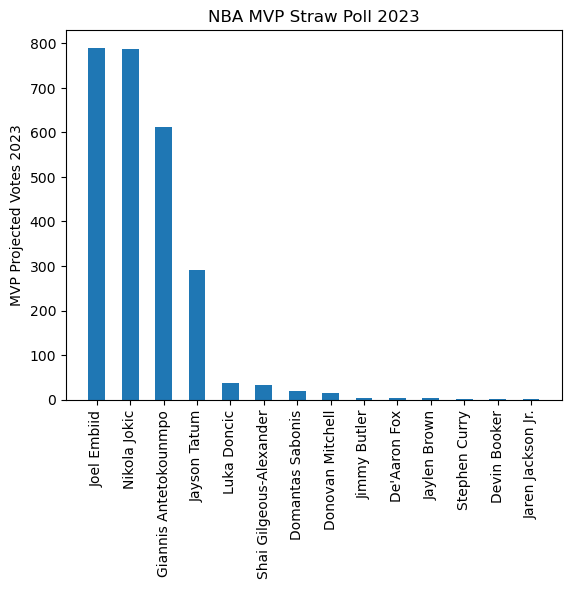

In [60]:
plt.bar(x=mvppoll23['Player'],height=mvppoll23['TOTALPOINTS'],width=0.5)
plt.title('NBA MVP Straw Poll 2023')
plt.ylabel("MVP Projected Votes 2023")
plt.xticks(rotation=90)
plt.show()

In [61]:
#Looking at the progression of potential mvp candidates statitics from 2022 to 2023 via a join

In [62]:
frontrunners = nba22.merge(potentialmvps23, on='Player', how='right',suffixes=('_22','_23'))
print(frontrunners)

     Rk                   Player Pos  Age   Tm  G_22  GS    MP    FG   FGA  \
0   141              Luka Doncic  PG   22  DAL    65  65  35.4   9.9  21.6   
1    12    Giannis Antetokounmpo  PF   27  MIL    67  67  32.9  10.3  18.6   
2   162              Joel Embiid   C   27  PHI    68  68  33.8   9.8  19.6   
3   290             Nikola Jokic   C   26  DEN    74  74  33.5  10.3  17.7   
4   332           Damian Lillard  PG   31  POR    29  29  36.4   7.7  19.0   
5   274             LeBron James   C   37  LAL    56  56  37.2  11.4  21.8   
6   526             Jayson Tatum  SF   23  BOS    76  76  35.9   9.3  20.6   
7   126            Stephen Curry  PG   33  GSW    64  64  34.5   8.4  19.1   
8   192  Shai Gilgeous-Alexander  PG   23  OKC    56  56  34.7   8.5  18.8   
9   154             Kevin Durant  PF   33  BRK    55  55  37.2  10.5  20.3   
10  390                Ja Morant  PG   22  MEM    57  57  33.1  10.2  20.6   

    ...   PF  PTS_22   PRA    AST/TO  FT_PTS   FT_PTS%  G_23  T

In [63]:
frontrunnerscomp = frontrunners[frontrunners['G_22'].notnull()]
frontrunnerscomp = frontrunnerscomp.reset_index(drop=True)
frontrunnerscomp = frontrunnerscomp[["Player","G_22","TRB_22","AST_22","PTS_22","G_23","TRB_23","AST_23","PTS_23"]]
print(frontrunnerscomp)

                     Player  G_22  TRB_22  AST_22  PTS_22  G_23  TRB_23  \
0               Luka Doncic    65     9.1     8.7    28.4    66     8.6   
1     Giannis Antetokounmpo    67    11.6     5.8    29.9    63    11.8   
2               Joel Embiid    68    11.7     4.2    30.6    66    10.2   
3              Nikola Jokic    74    13.8     7.9    27.1    69    11.8   
4            Damian Lillard    29     4.1     7.3    24.0    58     4.8   
5              LeBron James    56     8.2     6.2    30.3    55     8.3   
6              Jayson Tatum    76     8.0     4.4    26.9    74     8.8   
7             Stephen Curry    64     5.2     6.3    25.5    56     6.1   
8   Shai Gilgeous-Alexander    56     5.0     5.9    24.5    68     4.8   
9              Kevin Durant    55     7.4     6.4    29.9    47     6.7   
10                Ja Morant    57     5.7     6.7    27.4    61     5.9   

    AST_23  PTS_23  
0      8.0    32.4  
1      5.7    31.1  
2      4.2    33.1  
3      9.8    2

In [64]:
frontrunnerscomp["TRB%YtY"] = frontrunnerscomp["TRB_23"]/frontrunnerscomp["TRB_22"]
frontrunnerscomp["AST%YtY"] = frontrunnerscomp["AST_23"]/frontrunnerscomp["AST_22"]
frontrunnerscomp["PTS%YtY"] = frontrunnerscomp["PTS_23"]/frontrunnerscomp["PTS_22"]
print(frontrunnerscomp)

                     Player  G_22  TRB_22  AST_22  PTS_22  G_23  TRB_23  \
0               Luka Doncic    65     9.1     8.7    28.4    66     8.6   
1     Giannis Antetokounmpo    67    11.6     5.8    29.9    63    11.8   
2               Joel Embiid    68    11.7     4.2    30.6    66    10.2   
3              Nikola Jokic    74    13.8     7.9    27.1    69    11.8   
4            Damian Lillard    29     4.1     7.3    24.0    58     4.8   
5              LeBron James    56     8.2     6.2    30.3    55     8.3   
6              Jayson Tatum    76     8.0     4.4    26.9    74     8.8   
7             Stephen Curry    64     5.2     6.3    25.5    56     6.1   
8   Shai Gilgeous-Alexander    56     5.0     5.9    24.5    68     4.8   
9              Kevin Durant    55     7.4     6.4    29.9    47     6.7   
10                Ja Morant    57     5.7     6.7    27.4    61     5.9   

    AST_23  PTS_23   TRB%YtY   AST%YtY   PTS%YtY  
0      8.0    32.4  0.945055  0.919540  1.140845